# Traing Data
---

### 1. รหัส ชื่อ และหมู่ของนิสิตในกลุ่ม
+ 6610450960 นันท์นภัส ภูริภัทรพันธุ์ หมู่ 200    
+ 6610450986 พชร พรมแพง หมู่ 200
+ 6610451061 รตนกมล แก้วมาตย์ หมู่ 200

### 2. ลิงค์ไปยังข้อมูลที่จะใช้ในระบบต้นแบบ
https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images


### 3. ข้อมูลมีการ/น่าจะมีการสุ่มตัวอย่างมา (sampling) แบบใด เพราะเหตุใด มีปัญหาหรือไม่ อย่างไร แก้ไขได้อย่างไร


Dataset แบ่งออกเป็น 2 แบบคือ 
##### 1. REAL (ภาพที่มนุษย์ถ่าย / CIFAR-10) 
โดยผู้สร้างข้อมูล CIFAR-10 (Alex Krizhevsky, Vinod Nair, และ Geoffrey Hinton) ได้ทำการสุ่มตัวอย่างด้วยวิธี Convenience sampling โดยเลือกข้อมูลรูปที่เหมาะกับการ train model จาก 80 million tiny images แบ่งเป็น 10 คลาส โดยคลาสละ 6000 รูป ทั้งหมด 60000 รูป

##### 2. FAKE (AI-generated) 
ผู้สร้างข้อมูล (Bird & Lotfi) ได้สร้างรูปภาพโดยใช้ Stable Diffusion version 1.4 มาสร้างรูปภาพเสมือนโดยอิงจากข้อมูลรูปภาพ CIFAR-10 โดยใช้ prompt มากมายดังข้อที่ 7  

และเมื่อได้ข้อมูลมา ทางผู้สร้างได้แบ่งข้อมูลออกเป็น Train set ทั้งหมด 50000 รูปและ Test set อีก 10000 รูป โดย Test set ได้ทำการสุ่มตัวอย่างแบบ Stratified Sampling แบ่งรูปแต่ละคลาสอย่างละเท่า ๆ กัน และเนื่องจากข้อมูล Dataset มีการแบ่งเป็นกลุ่มโดยมีสัดส่วนเท่ากัน เพื่อลดปัญหาในการสุ่มตัวอย่างได้กลุ่มใดกลุ่มนึงมากกว่ากลุ่มอื่น จึงไม่มีปัญหาใด ๆ


### 4. ข้อมูลมีการ/น่าจะมีการกำหนดเฉลย (labeling) ด้วยวิธีใด เพราะเหตุใด มีปัญหาหรือไม่ อย่างไร แก้ไขได้อย่างไร


Dataset แบ่งออกเป็น 2 แบบคือ
##### 1. REAL (ภาพที่มนุษย์ถ่าย / CIFAR-10): 
การกำหนดเฉลยเป็นแบบ Hand Label เนื่องจากผู้สร้างชุดข้อมูลได้ทำการเลือกและจัดกลุ่มภาพด้วยตนเอง โดยผู้สร้างได้ตรวจสอบและจัดการข้อมูล เพื่อให้แน่ใจว่าการจัดกลุ่มภาพตรงกับความเป็นจริง และแบ่งคลาสตามลักษณะที่ต้องการ
##### 2. FAKE (AI-generated):
ภาพถูกสร้างโดย AI และออกแบบให้เหมือนกับภาพจาก CIFAR-10 แต่การกำหนดเฉลยยังคงเป็นแบบ Hand Label เพราะผู้สร้างยังคงใช้การจัดกลุ่มและกำหนดคลาสด้วยมือ

##### ปัญหา:
ข้อมูล REAL อาจมีปัญหาได้เพราะข้อมูล CIFAR-10 เป็น subset ของ 80 tiny million images ซึ่งเป็น Dataset ที่รวมรูปภาพจากการ query คำนามมากกว่า 53,464 คำบน Web search ดังนั้นอาจมีรูปภาพไม่ใช่มนุษย์ถ่ายปะปนเข้ามาได้ 
##### วิธีแก้ไข:
ตรวจสอบภาพและใช้ข้อมูลจากแหล่งอื่น ๆ เพื่อกรองภาพที่ไม่ตรงตามที่อธิบายกำหนดไว้


### 5. ข้อมูลขาดความสมดุล (imbalance) หรือไม่ อย่างไร มากน้อยแค่ไหน มีปัญหาหรือไม่ อย่างไร แก้ไขได้อย่างไร


ข้อมูล Dataset มีความสมดุลอยู่แล้ว  โดยข้อมูลใน Dataset มี 10 classes 
แต่ละ class มีรูป 6000 รูปเท่ากันทั้งหมด รวมทั้งหมด 60000 รูป จึงไม่มีปัญหา Imbalance และไม่จำเป็นต้องมีการแก้ไข


In [1]:
import os

# Directory containing the files
directory = './train/FAKE'

# Initialize counters for specific labels
counters = {str(i): 0 for i in range(1, 11)}

# Track filenames to check for overlaps
filenames = {str(i): [] for i in range(1, 11)}

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        # Check if the file has a label in parentheses
        if '(' in filename and ')' in filename:
            label = filename.split('(')[-1].split(')')[0]
        else:
            label = '1'
        
        # Update the counter if the label is between 1 and 10
        if label in counters:
            counters[label] += 1
            filenames[label].append(filename)

# Print the counts and some sample filenames for each label
for label, count in counters.items():
    print(f'Files ending with ({label}).jpg: {count}')
    print(f'Sample filenames for ({label}): {filenames[label][:5]}')  # Print first 5 filenames for each label

Files ending with (1).jpg: 5000
Sample filenames for (1): ['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg']
Files ending with (2).jpg: 5000
Sample filenames for (2): ['1000 (2).jpg', '1001 (2).jpg', '1002 (2).jpg', '1003 (2).jpg', '1004 (2).jpg']
Files ending with (3).jpg: 5000
Sample filenames for (3): ['1000 (3).jpg', '1001 (3).jpg', '1002 (3).jpg', '1003 (3).jpg', '1004 (3).jpg']
Files ending with (4).jpg: 5000
Sample filenames for (4): ['1000 (4).jpg', '1001 (4).jpg', '1002 (4).jpg', '1003 (4).jpg', '1004 (4).jpg']
Files ending with (5).jpg: 5000
Sample filenames for (5): ['1000 (5).jpg', '1001 (5).jpg', '1002 (5).jpg', '1003 (5).jpg', '1004 (5).jpg']
Files ending with (6).jpg: 5000
Sample filenames for (6): ['1000 (6).jpg', '1001 (6).jpg', '1002 (6).jpg', '1003 (6).jpg', '1004 (6).jpg']
Files ending with (7).jpg: 5000
Sample filenames for (7): ['1000 (7).jpg', '1001 (7).jpg', '1002 (7).jpg', '1003 (7).jpg', '1004 (7).jpg']
Files ending with (8).jpg: 5000
Sample filename

### 6. จำเป็นหรือสามารถสร้างข้อมูลเพิ่ม (augmentation) ได้หรือไม่ อย่างไร


ไม่มีความจำเป็นต้องสร้างข้อมูลเพิ่ม เนื่องจาก Dataset มีข้อมูลจำนวนมากและแบ่งเป็น 10 กลุ่มชัดเจน 

และหากทำการใช้วิธี Simple Label-Preserving Transformation (เช่น การหมุนภาพ การครอบตัดภาพ) หรือ วิธี Perturabation (การเพิ่ม Noise) ในรูปภาพ อาจทำให้ model ไม่รู้จักรูปภาพในกรณีที่มีการครอบตัดรูปภาพ เนื่องจากรูปภาพมีขนาดเพียง 32x32 pixels ซึ่งเป็นขนาดที่เล็กมาก และการเพิ่ม Noise อาจทำให้ภาพเหลือแต่ Noise และข้อมูลภาพจริงหายไป


<!-- แต่อาจใช้เป็นวิธี Simple Label-Preserving Transformation เพื่อป้องกันการเกิด Overfitting ใน model โดยปรับแต่งข้อมูลตัวอย่าง ให้มีข้อมูลหลากหลายมากขึ้น เช่น การหมุนภาพ การครอบตัดภาพ โดยไม่ควรใช้วิธี Perturabation หรือการเพิ่ม Noise ในรูปภาพ เนื่องจากเดิมทีภาพมีขนาดที่เล็กแล้ว ซึ่งอาจทำให้ภาพเหลือแต่ Noise และข้อมูลภาพจริงหายไป -->


<!-- // ทำแล้วไม่รู้จักรูป -->

### 7. ประเด็นอื่น ๆ ที่เกี่ยวข้องกับข้อมูลของตัวเอง

Prompt ที่ทางผู้สร้างข้อมูล (Bird & Lotfi) FAKE Images ผ่าน equivalent of CIFAR-10 with Stable Diffusion version 1.4
https://ieeexplore.ieee.org/abstract/document/10409290


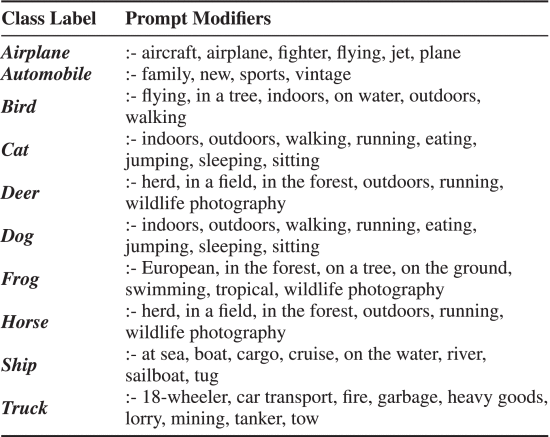

In [1]:
from PIL import Image
image = Image.open("hw_assets/bird.png")
image

### 8. การมีส่วนร่วมของสมาชิกแต่ละคนในกลุ่ม
+ 6610450960 นันท์นภัส ภูริภัทรพันธุ์ หมู่ 200 (วางแผนในการทำงาน, หาข้อมูล)
+ 6610450986 พชร พรมแพง หมู่ 200 (วิเคราะห์ข้อมูล, และเขียนโค้ดที่ใช้)
+ 6610451061 รตนกมล แก้วมาตย์ หมู่ 200 (เรียบเรียงข้อมูล, ตรวจสอบภาพรวมข้อมูล)


### 9. การเปิดเผยการใช้เครื่องมือปัญญาประดิษฐ์ (ใช้อะไร ใช้เพื่ออะไร ใช้อย่างไร, prompt อย่างไร)

9.1 ChatGPT

ใช้เพื่อนำโค้ดไป validation ข้อมูล Dataset และตรวจสอบว่ามี Class imbalance หรือไม่ 

Prompt: “how to count the amount of file ending with (1) and other labels and the labels (1) doesn't has ending like (1) it has ending tag as .jpg for example, 1000.jpg but, the others is 1000 (2).jpg ” and upload the picture



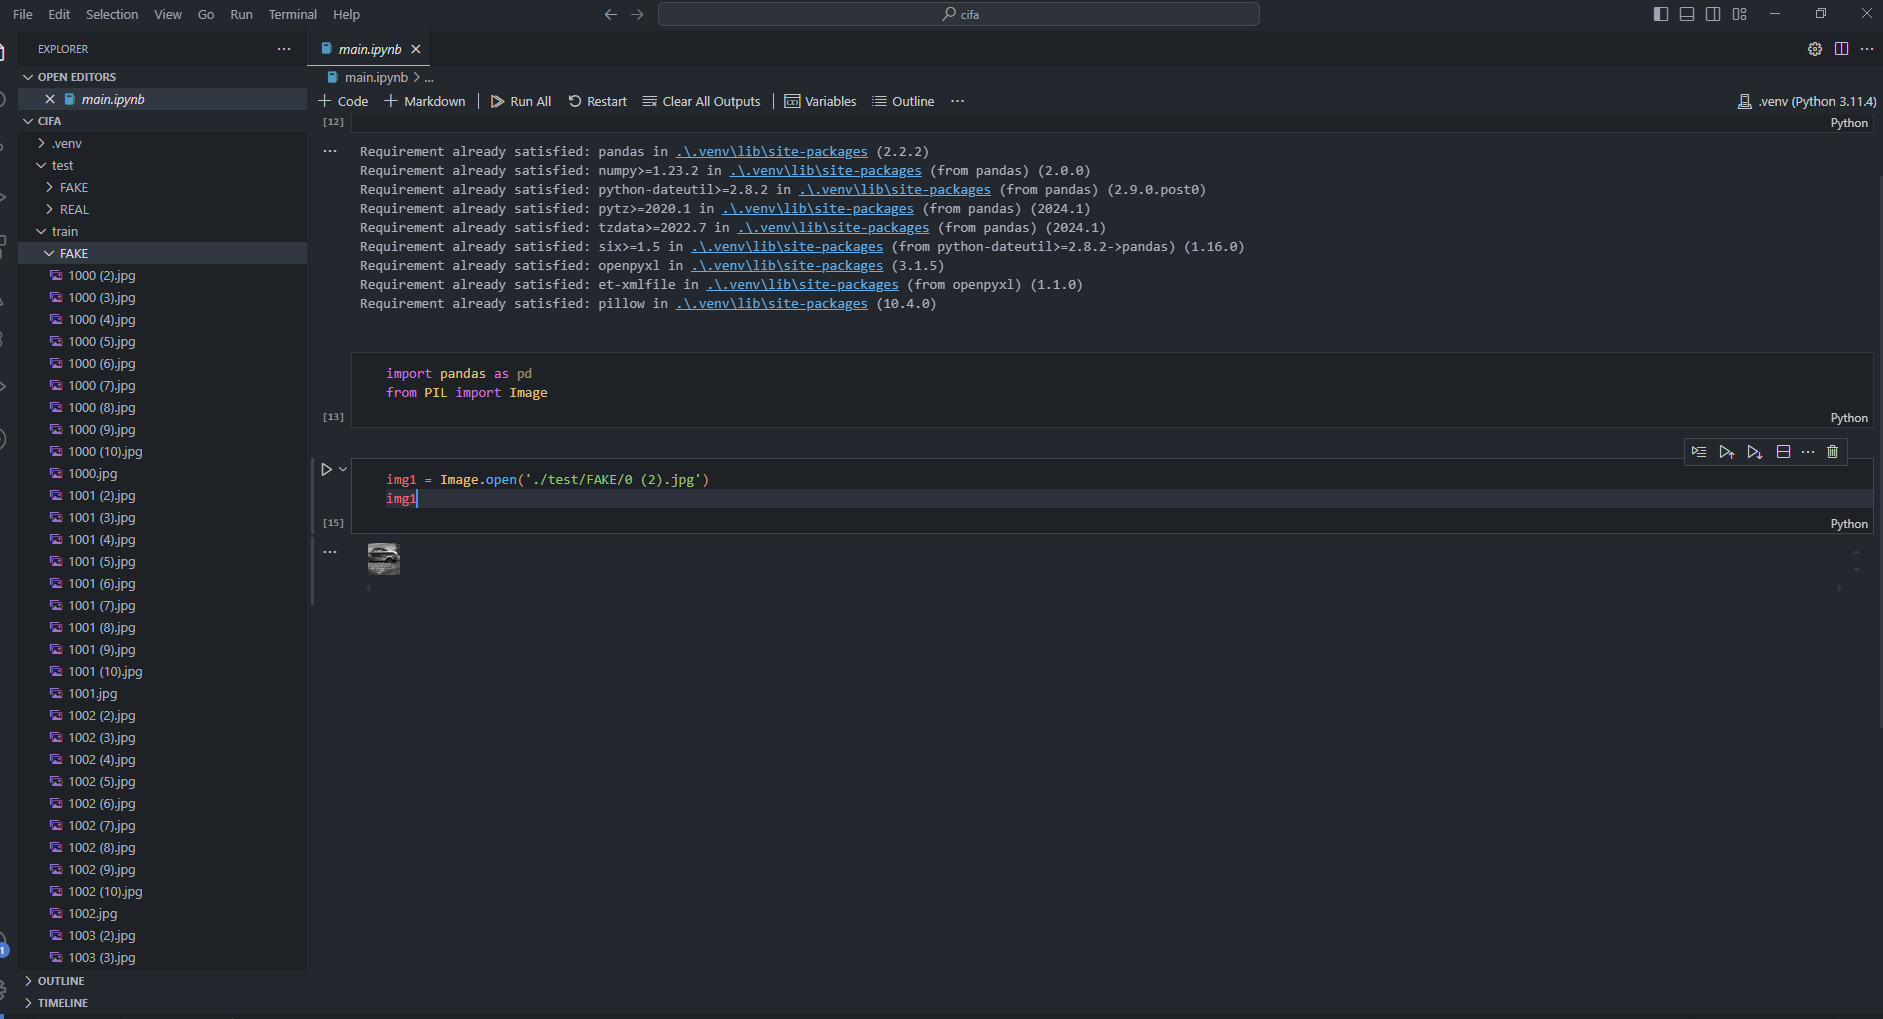

In [4]:
from PIL import Image
image = Image.open("hw_assets/moo.png")
image